#### We start By importing the requisite Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm  import SVC
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import seaborn as sns
import os
import tensorflow as tk
from tensorflow import keras

## Malaria Data Analysis

#### Read Dataset

In [2]:
df = pd.read_csv('malariaTraining.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria


#### Dataset Characteristics

In [4]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,120.0,120.0,120.0,120.0,120.0,120.000000,120.0,120.0,120.0,120.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
mean,0.0,0.0,0.0,0.0,0.0,0.950000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.218859,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check for null and NaN values

In [5]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Symptom severity rank

In [6]:
df1 = pd.read_csv('Symptom-severity.csv')

In [7]:
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


Get overall list of symptoms

In [8]:
df1['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

#### Select the features as symptoms column and label as Prognosis column
#### Also in this dataset every prognoses that is not malaria is assigned the value of 0. while every prognosis that is malaria is 
#### assigned the value 1

In [9]:
da = pd.read_csv('dataSet1.csv')
data = da.iloc[:,1:].values
labels = da['prognosis'].values

In [10]:
print(labels[:1000])

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [11]:
from sklearn.model_selection import train_test_split

#### Split the data, labels with shuffle

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 132) (738, 132) (4182,) (738,)


#### Initialize and train a Support vector classifier

In [14]:
svc_model = SVC()

In [15]:
x_train = x_train/255

In [16]:
svc_model.fit(x_train, y_train)

SVC()

#### Make a prediction using the test set

In [17]:
svc_prediction=svc_model.predict(x_test)

In [18]:
print('F1-score% =', f1_score(y_test, svc_prediction, average='macro')*100, '|', 'Accuracy% =',
      accuracy_score(y_test, svc_prediction)*100)

F1-score% = 43.792840822543795 | Accuracy% = 77.91327913279133


In [19]:
svc_prediction[1]

1

In [20]:
svc_pred_labels = [np.argmax(i) for i in svc_prediction]

In [21]:
svc_pred_labels[:5]

[0, 0, 0, 0, 0]

# Confusion Matrix

In [22]:
cm=confusion_matrix(y_test,svc_pred_labels)

In [23]:
cm

array([[163,   0],
       [575,   0]], dtype=int64)

In [24]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

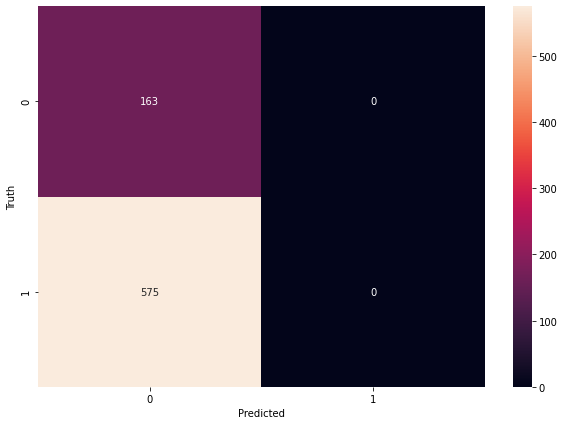

In [25]:
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
TP = 0
TN = 720
FN = 18
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')

Accuracy=(TP + TN)/n
		=97.56%

Sensitivity=(TPR)=TP/(FN + TP)
		=0.0%

Specificity=(TNR)=TN/(TN + FP)
		=100.0%

False positive rate(FPR)=FP/(TN + TP)
		=0.0%

False negative rate(FNR)=FN/(FN + TP)
		=100.0%

Precision=TP/(TP+FP)


ZeroDivisionError: division by zero

In [ ]:
df = pd.DataFrame(svc_pred_labels,columns=['Summary Statistics'])
df.describe()

In [ ]:
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,svc_pred_labels)

# Mean absolute error
mae=mean_absolute_error(y_test, svc_pred_labels)

# root mean square error
rms = sqrt(mean_squared_error(y_test,svc_pred_labels))

# Coefficient of determination
cd = r2_score(y_test, svc_pred_labels)

# mean
mean = np.mean(svc_pred_labels)

# Standard Deviation
std = np.std(nt_pred_labels)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))


### Next we will build an artificial neural network to model our data and make predictions

In [ ]:
len(x_train)

In [ ]:
len(y_train)

In [ ]:
x_train[0].shape

In [ ]:
x_train[0]

In [ ]:
x_train.shape

In [ ]:
from tensorflow import keras

In [ ]:
x_test.shape

#### Below Sequential means am having a stack of layers in my neural network. And since it is a stack it will accept every layer as one
#### element.Dense means all the neurons in one layer are connected to every other neuron in the next layer.The Dense method accepts
#### three arguments: The output shape,input shape and the activation function

In [ ]:
nt_model = keras.Sequential([
   tk.keras.layers.Dense(2,input_shape=(132,),activation='sigmoid') 
])

In [ ]:
nt_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
)

In [ ]:
nt_model.fit(x_train, y_train,epochs=5)

In [ ]:
nt_model.evaluate(x_test,y_test)

In [ ]:
nt_prediction=nt_model.predict(x_test)

In [ ]:
nt_prediction[1]

In [ ]:
nt_prediction

In [ ]:
nt_pred_labels = [np.argmax(i) for i in nt_prediction]

In [ ]:
nt_pred_labels[:5]

# Confusion Matrix

In [ ]:
cm=tk.math.confusion_matrix(labels=y_test,predictions=nt_pred_labels)

In [ ]:
print(cm)

In [ ]:

new_cm = [[717, 0],[3, 18]]


In [ ]:
plt.figure(figsize= (10,7))
sn.heatmap(new_cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
TP = 18
TN = 717
FN = 3
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')

In [ ]:
df = pd.DataFrame(nt_pred_labels,columns=['Summary Statistics'])
df.describe()

In [ ]:

from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,nt_pred_labels)

# Mean absolute error
mae=mean_absolute_error(y_test, nt_pred_labels)

# root mean square error
rms = sqrt(mean_squared_error(y_test,nt_pred_labels))

# Coefficient of determination
cd = r2_score(y_test, nt_pred_labels)

# mean
mean = np.mean(nt_pred_labels)

# Standard Deviation
std = np.std(nt_pred_labels)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))


### Next we are going to use the Naive Bayes Algorithm to model our dataset and make predictions

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred_label = [np.argmax(i) for i in pred]

In [ ]:
pred_label[:5]

# Confusion Matrix

In [ ]:
cm=tk.math.confusion_matrix(labels=y_test,predictions=nt_pred_labels)

In [ ]:
cm

In [ ]:
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### From above we can see that our naive beyes algorithm missclassified 0 point i.e 100% accuracy

In [ ]:
TP = 15
TN = 723
FN = 0
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')

In [ ]:
df = pd.DataFrame(pred_label,columns=['Summary Statistics'])
df.describe()

In [ ]:
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,pred_label)

# Mean absolute error
mae=mean_absolute_error(y_test, pred_label)

# root mean square error
rms = sqrt(mean_squared_error(y_test,pred_label))

# Coefficient of determination
cd = r2_score(y_test, pred_label)

# mean
mean = np.mean(pred_label)

# Standard Deviation
std = np.std(pred_label)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))

# Performance Summary

In [ ]:
svc_stat = np.array(['Support Vector Machine','100'
,'0','0','3',
'17','-3','738'])

nt_stat = np.array(['Artificial Neural Network','99'
,'1','92','0',
'6','85','738'])

naive_bayes_stat = np.array(['Naive Bayes','100'
,'0','0','3',
'17','-3','738'])


In [ ]:


#create data
df = pd.DataFrame([svc_stat,nt_stat,naive_bayes_stat],columns=['Classifier','Correctly classified Accuracy (in %)'
,'Incorrectly classified(in %)','Kapa Statistics (in %)','Mean Absolute Error (in %)',
'Root Mean sq. Error (in %)','Coefficient of determination (in %)','Number Instance'])


In [ ]:
df

## Typhoid Analysis

#### Read Dataset

In [ ]:
df = pd.read_csv('typhoidTraining.csv')

In [ ]:
df.head()

#### Dataset Characteristics

In [ ]:
df.describe()

#### Select the features as symptoms column and label as Prognosis column
#### Also in this dataset every prognoses that is not typhoid is assigned the value of 0. while every prognosis that is typhoid is¶
#### assigned the value 1

In [ ]:
da = pd.read_csv('dataSet2.csv')
data = da.iloc[:,1:].values
labels = da['prognosis'].values

In [ ]:
from sklearn.model_selection import train_test_split

#### Split the data, labels with shuffle

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=False, train_size = 0.85)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#### Initialize and train a Support vector classifier

In [ ]:
model = SVC()

#### Make a prediction using the test set

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred=model.predict(x_test)

#### print to screen the accuracy of our prediction

In [ ]:
print('F1-score% =', f1_score(y_test, pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, pred)*100)

# Confusion Matrix

In [ ]:
pred_label = [np.argmax(i) for i in pred]
cm=tk.math.confusion_matrix(labels=y_test,predictions=pred_label)
print(cm)
new_cm = [[718, 0],[0,20]]
plt.figure(figsize= (10,7))
sn.heatmap(new_cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

TP = 20
TN = 718
FN = 0
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')


df = pd.DataFrame(pred_label,columns=['Summary Statistics'])
df.describe()

from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,pred_label)

# Mean absolute error
mae=mean_absolute_error(y_test, pred_label)

# root mean square error
rms = sqrt(mean_squared_error(y_test,pred_label))

# Coefficient of determination
cd = r2_score(y_test, pred_label)

# mean
mean = np.mean(pred_label)

# Standard Deviation
std = np.std(pred_label)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))

## Next We will train an Artificial neural network to model our data and make predictions

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(2,input_shape=(132,),activation='sigmoid') 
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
)

In [ ]:
model.fit(x_train, y_train,epochs=5)

#### On our training dataset our neural network achieved 99% accuracy

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
pred=model.predict(x_test)
pred_label = [np.argmax(i) for i in pred]
cm=tk.math.confusion_matrix(labels=y_test,predictions=pred_label)
cm
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

TP = 18
TN = 718
FN = 2
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')


df = pd.DataFrame(pred_label,columns=['Summary Statistics'])
df.describe()

from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,pred_label)

# Mean absolute error
mae=mean_absolute_error(y_test, pred_label)

# root mean square error
rms = sqrt(mean_squared_error(y_test,pred_label))

# Coefficient of determination
cd = r2_score(y_test, pred_label)

# mean
mean = np.mean(pred_label)

# Standard Deviation
std = np.std(pred_label)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))

### Naive Bayes Algorithm

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

In [ ]:

pred_label = [np.argmax(i) for i in y_pred]
cm=tk.math.confusion_matrix(labels=y_test,predictions=pred_label)
cm
new_cm = [[718, 0],[0,20]]
plt.figure(figsize= (10,7))
sn.heatmap(new_cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

TP = 20
TN = 718
FN = 0
FP = 0
print('Accuracy=(TP + TN)/n')
print(f'\t\t={round((TP+TN)/738*100,2)}%\n')
print('Sensitivity=(TPR)=TP/(FN + TP)')
print(f'\t\t={round(TP/(FN+TP)*100,2)}%\n')
print('Specificity=(TNR)=TN/(TN + FP)')
print(f'\t\t={round(TN/(TN+FP)*100,2)}%\n')
print('False positive rate(FPR)=FP/(TN + TP)')
print(f'\t\t={round(FP/(TN+TP)*100,2)}%\n')
print('False negative rate(FNR)=FN/(FN + TP)')
print(f'\t\t={round(FN/(FN+TP)*100,2)}%\n')
print('Precision=TP/(TP+FP)')
print(f'\t\t={round(TP/(TP+FP)*100,2)}%\n')


df = pd.DataFrame(pred_label,columns=['Summary Statistics'])
df.describe()

from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# kappa statistics
kapa=cohen_kappa_score(y_test,pred_label)

# Mean absolute error
mae=mean_absolute_error(y_test, pred_label)

# root mean square error
rms = sqrt(mean_squared_error(y_test,pred_label))

# Coefficient of determination
cd = r2_score(y_test, pred_label)

# mean
mean = np.mean(pred_label)

# Standard Deviation
std = np.std(pred_label)

print("Mean = {0:.0f}".format(mean*100))

print("std = {0:.0f}".format(std*100))

print("Mae = {0:.0f}".format(mae*100))

print("Kapa = {0:.0f}".format(kapa*100))

print("Rms = {0:.0f}".format(rms*100))

print("Cd = {0:.0f}".format(cd*100))

# Performance Summary

In [ ]:
svc_stat = np.array(['Support Vector Machine','100'
,'0','0','3',
'16','-3','738'])

nt_stat = np.array(['Artificial Neural Network','99'
,'1','95','0',
'5','90','738'])

naive_bayes_stat = np.array(['Naive Bayes','100'
,'0','0','3',
'16','-3','738'])

#create data
df = pd.DataFrame([svc_stat,nt_stat,naive_bayes_stat],columns=['Classifier','Correctly classified Accuracy (in %)'
,'Incorrectly classified(in %)','Kapa Statistics (in %)','Mean Absolute Error (in %)',
'Root Mean sq. Error (in %)','Coefficient of determination (in %)','Number Instance'])


In [ ]:
df